In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
df=pd.read_csv("C:/Users/dell/Modified_Credit_card.csv")
df.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAYMENT,PAY_TO_BILL
0,0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.089434
1,1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.292791
2,2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0.108388
3,3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0.036259
4,4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,0.540054


In [3]:
df.drop('Unnamed: 0',axis= 1, inplace=True)

In [4]:
df_boost= df.copy()

#changing column data types
for col in ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    df_boost[col]=df_boost[col].astype('category')

In [5]:
df_boost.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'TOTAL_BILL', 'TOTAL_PAYMENT',
       'PAY_TO_BILL'],
      dtype='object')

# **ADABOOST**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

In [7]:
X=df_boost.drop('default.payment.next.month', axis=1)
Y=df_boost['default.payment.next.month']

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state= 42)

#Model fit
model_ada= AdaBoostClassifier(n_estimators= 300)
model_ada.fit(X_train, y_train)

y_pred=model_ada.predict(X_test)
y_pred_prob= model_ada.predict_proba(X_test)[:,1]

#Metric calculation
accuracy= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8158
Precision: 0.6688
F1 Score: 0.4272
Recall: 0.3138
AUC: 0.7788


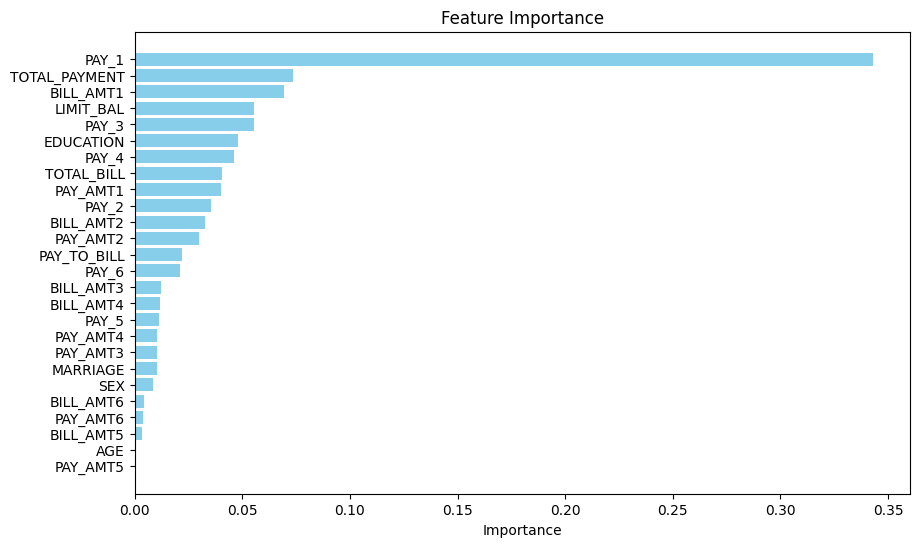

In [9]:
feature_importances = model_ada.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# **ADABOOST WITH SMOTE**

In [10]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,5,6,7,8,9,10])
X_smotenc, y_smotenc = sm.fit_resample(X_train, y_train)

In [11]:
model_ada=AdaBoostClassifier(n_estimators=300)
model_ada.fit(X_smotenc,y_smotenc)

y_pred=model_ada.predict(X_test)
y_pred_prob=model_ada.predict_proba(X_test)[:, 1]

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7485
Precision: 0.4436
F1 Score: 0.5054
Recall: 0.5872
AUC: 0.7528


# **XGBOOST**

In [12]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(tree_method="hist", enable_categorical=True)

# fit model
model_xgb.fit(X_train, y_train)

# make predictions
y_pred = model_xgb.predict(X_test)
y_pred_prob=model_xgb.predict_proba(X_test)[:,1]

#Metrics calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8135
Precision: 0.6263
F1 Score: 0.4623
Recall: 0.3663
AUC: 0.7597


# **XGBOOST WITH SMOTE**

In [13]:
model_xgb = XGBClassifier(tree_method="hist", enable_categorical=True)

# fit model
model_xgb.fit(X_smotenc, y_smotenc)

# make predictions
y_pred = model_xgb.predict(X_test)
y_pred_prob=model_xgb.predict_proba(X_test)[:,1]

#Metric calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7670
Precision: 0.4700
F1 Score: 0.4883
Recall: 0.5080
AUC: 0.7411


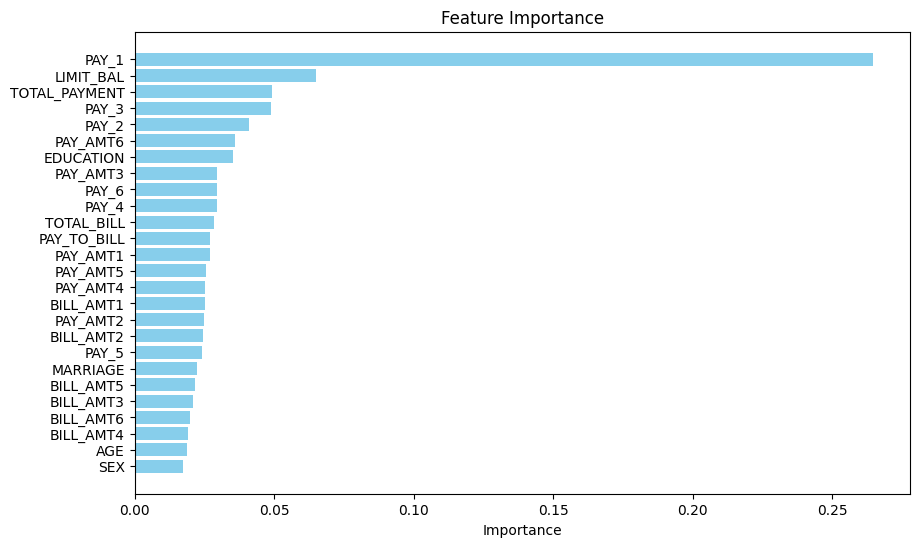

In [14]:
feature_importances = model_xgb.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [15]:
boost_score=[
    [0.8158, 0.6688, 0.4272, 0.3138, 0.7788],
    [0.7485, 0.4436, 0.5054, 0.5872, 0.7528],
    [0.8135, 0.6263, 0.4623, 0.3663, 0.7597],
    [0.7670, 0.4700, 0.4883, 0.5080, 0.7411]
]

#update model name
models= [
    'Adaboost',
    'Adaboost with SMOTE',
    'XGBoost',
    'XGBoost with SMOTE'
]

# Create the DataFrame
boosting = pd.DataFrame(boost_score, columns=['Accuracy', 'Precision', 'F1 Score', 'Recall', 'AUC'])

# Add the model names as a column
boosting['Model'] = models

# Set the 'Model' column as the index
boosting.set_index('Model', inplace=True)

In [16]:
boosting

,Accuracy,Precision,F1 Score,Recall,AUC
Model,,,,,
Adaboost,0.8158,0.6688,0.4272,0.3138,0.7788
Adaboost with SMOTE,0.7485,0.4436,0.5054,0.5872,0.7528
XGBoost,0.8135,0.6263,0.4623,0.3663,0.7597
XGBoost with SMOTE,0.7670,0.4700,0.4883,0.5080,0.7411


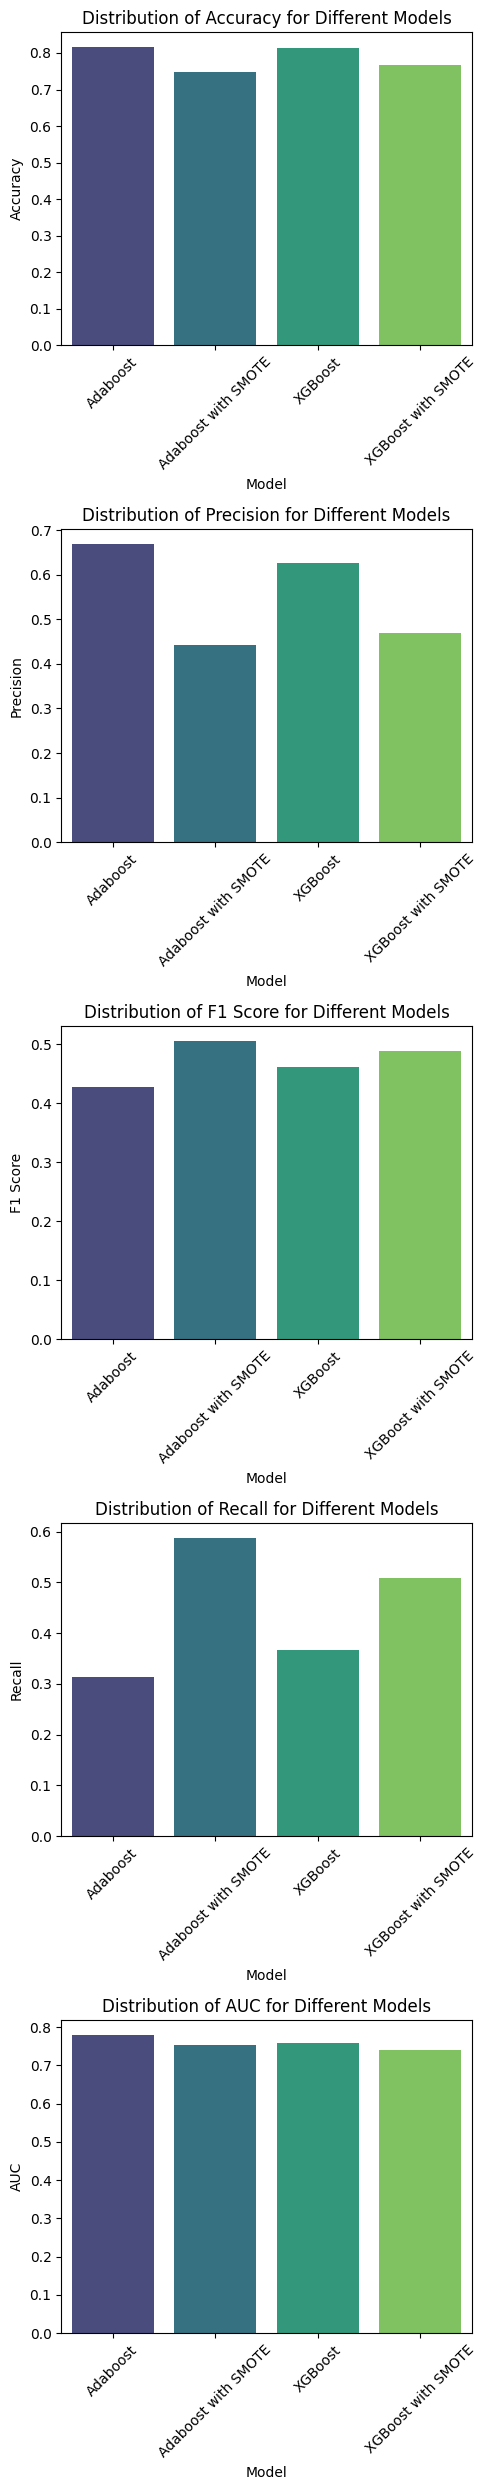

In [17]:
boosting_table= boosting.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Value')

# Get the unique metrics
metrics = boosting_table['Metric'].unique()

# Create a grid of subplots
num_metrics = len(metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(5,num_metrics*5))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=boosting_table[boosting_table['Metric'] == metric],
                x='Model', y='Value', ax=ax, palette="viridis")
    ax.set_title(f'Distribution of {metric} for Different Models')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Boosting_metrics_distribution.jpeg', format='jpeg')